<a href="https://colab.research.google.com/github/gauravsekhri/EDA-on-Indian-Cuisine/blob/main/Indian_Cuisine_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [22]:
df = pd.read_csv("/content/indian_food.csv");
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [23]:
df.shape

(255, 9)

In [24]:
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df.fillna(0)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,0.0,0.0,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    object 
 1   ingredients     255 non-null    object 
 2   diet            255 non-null    object 
 3   prep_time       225 non-null    float64
 4   cook_time       227 non-null    float64
 5   flavor_profile  226 non-null    object 
 6   course          255 non-null    object 
 7   state           231 non-null    object 
 8   region          241 non-null    object 
dtypes: float64(2), object(7)
memory usage: 18.1+ KB


In [26]:
total_state = list(df['state'].value_counts().index)
total_state

['Gujarat',
 'Punjab',
 'Maharashtra',
 'West Bengal',
 'Assam',
 'Tamil Nadu',
 'Andhra Pradesh',
 'Uttar Pradesh',
 'Kerala',
 'Odisha',
 'Rajasthan',
 'Karnataka',
 'Telangana',
 'Goa',
 'Bihar',
 'Manipur',
 'Madhya Pradesh',
 'Jammu & Kashmir',
 'Nagaland',
 'Chhattisgarh',
 'Haryana',
 'Tripura',
 'Uttarakhand',
 'NCT of Delhi']

<BarContainer object of 2 artists>

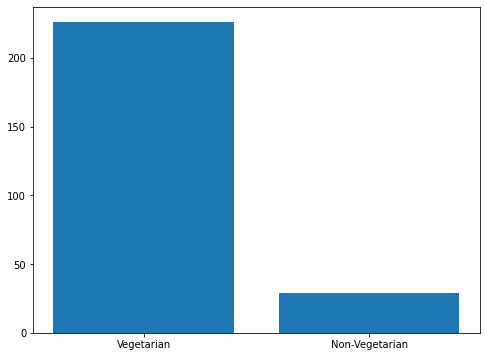

In [27]:
Veg = (df['diet'].str[0].str.lower() == 'v').sum()

NonVeg = (df['diet'].str[0].str.lower() == 'n').sum()

names = ["Vegetarian", "Non-Vegetarian"]
values = [Veg, NonVeg]

fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharey=True)
axs.bar(names, values)

In [28]:
print("Total Number of Vegetarians: ", Veg)
print("Total Number of Non-Vegetarians: ", NonVeg)

Total Number of Vegetarians:  226
Total Number of Non-Vegetarians:  29


In [29]:
df['diet']

0      vegetarian
1      vegetarian
2      vegetarian
3      vegetarian
4      vegetarian
          ...    
250    vegetarian
251    vegetarian
252    vegetarian
253    vegetarian
254    vegetarian
Name: diet, Length: 255, dtype: object

In [30]:
fig = px.histogram(df, y="region", x="state", color="diet", barmode="overlay", hover_data=df.columns, title="Visualization of Veg & Non-Veg dishes in respect to state and region")
fig.show()

In [31]:
fig = px.histogram(df.dropna(),x='region',color = 'region', title="Region wise count")
fig.show()

In [32]:
total_flavor_profiles = list(df['flavor_profile'].value_counts().index)
total_flavor_profiles 

flavor_count = list(df['flavor_profile'].value_counts())
flavor_count

print(total_flavor_profiles)
print(flavor_count)

['spicy', 'sweet', 'bitter', 'sour']
[133, 88, 4, 1]


In [33]:
labels = total_flavor_profiles
values = flavor_count

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [34]:
total_course = list(df['course'].value_counts().index)
total_course 

course_count = list(df['course'].value_counts())
course_count

print(total_course)
print(course_count)

['main course', 'dessert', 'snack', 'starter']
[129, 85, 39, 2]


In [35]:
labels = total_course
values = course_count

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [36]:
fig = px.bar(df, x="state", y="course", color="course", title="State wise Courses")
fig.show()

In [37]:
fig = px.histogram(df, x='prep_time',title = 'Preperation Time')
fig.show()

In [38]:
fig = px.histogram(df, x='cook_time', title = 'Cooking Time')
fig.show()